# **Import library:**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math


# **Read data:**

In [12]:
DataSubmission=pd.read_csv('/kaggle/input/housepricepj/sample_submission.csv')
DataTest=pd.read_csv('/kaggle/input/housepricepj/test.csv')
DataTrain=pd.read_csv('/kaggle/input/housepricepj/train.csv')

In [13]:
# Check the shape of the dataset
print(f'Train data shape: {DataTrain.shape}')
print(f'Test data shape: {DataTest.shape}')

Train data shape: (1460, 81)
Test data shape: (1459, 80)


# **Data visualization**

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

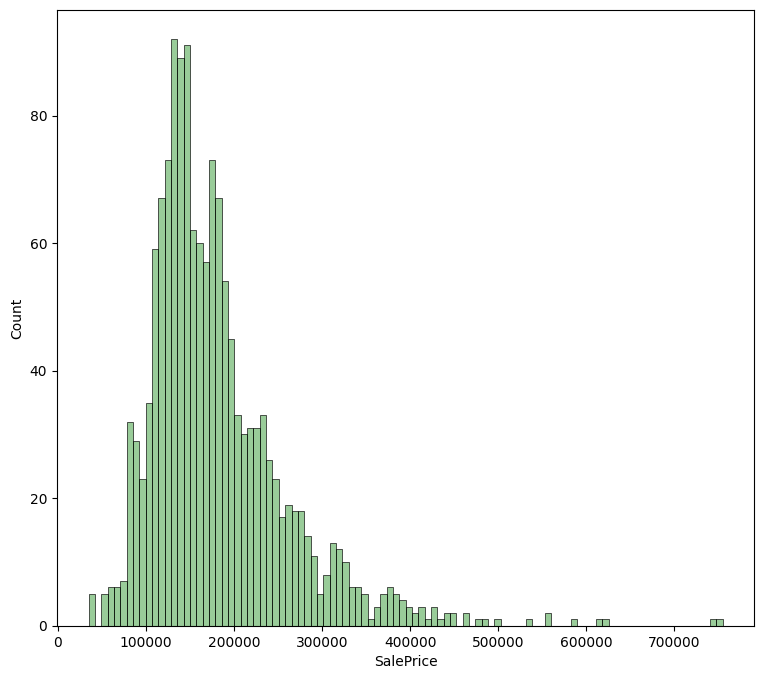

In [41]:
#how the house prices are distributed
print(DataTrain['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(DataTrain['SalePrice'], color='g', bins=100, alpha=0.4)

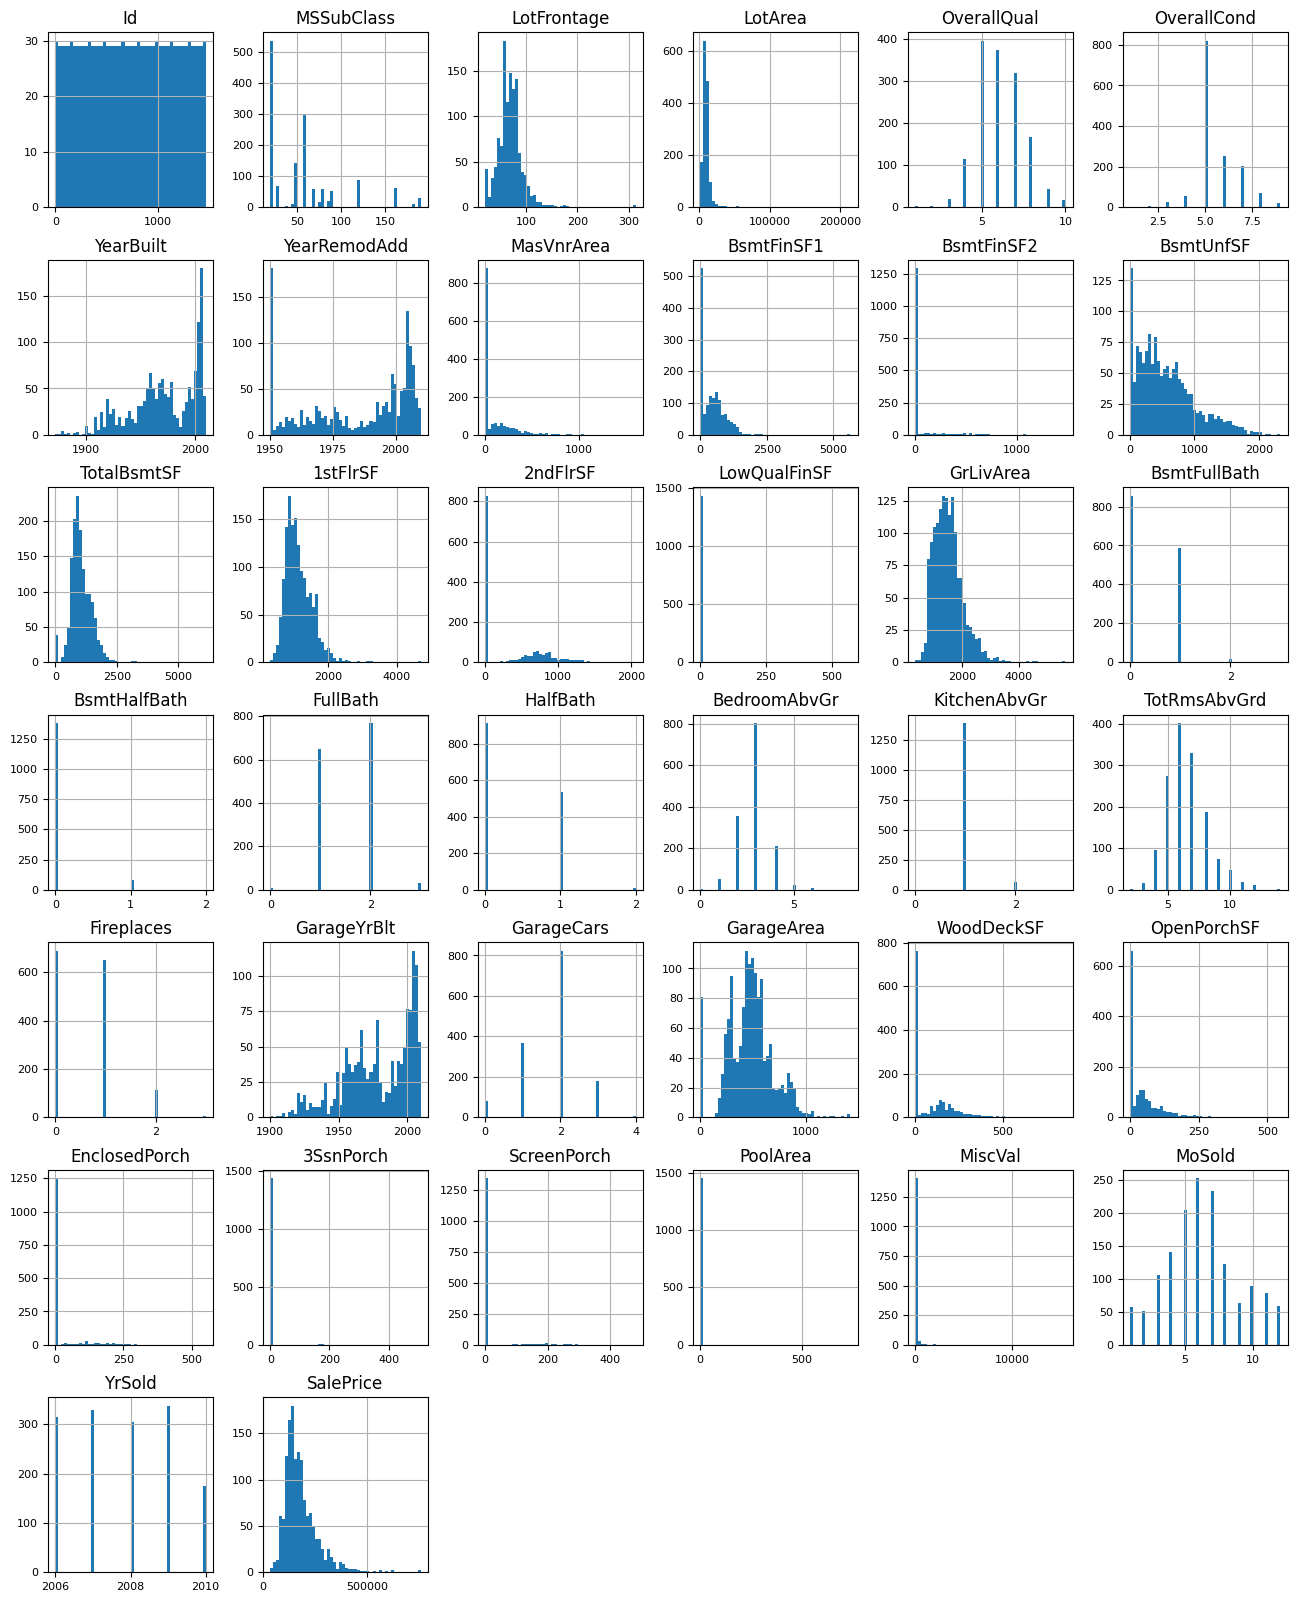

In [15]:
#plot the distribution for all the numerical features.

df_num = DataTrain.select_dtypes(include=['number'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# **Drop Id column**

In [16]:
# Assign the ID to Id_column to use it later in Excel sheet
Id_column = DataTest['Id']

# Drop ID column because we don't need it 
DataTest.drop(['Id'], axis = 1, inplace = True)
DataTest.shape

(1459, 79)

In [17]:
DataTrain.drop(['Id'], axis = 1, inplace = True)
DataTrain.shape

(1460, 80)

# **Data cleaning**

**Training data**

In [18]:
# count number of null values in training data
Train_Nul = DataTrain.isnull().sum()
Train_Nul = Train_Nul[Train_Nul>0].sort_values(ascending=False)
Train_Nul

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [19]:
# calculate the precentage of null values in training data
Null_precentage=[(i, DataTrain[i].isna().mean()*100 ) for i in DataTrain]
null_df=pd.DataFrame(Null_precentage, columns=['columnName','percentage'])

null_df[null_df['percentage']>15].sort_values('percentage')

,columnName,percentage
2,LotFrontage,17.739726
56,FireplaceQu,47.260274
24,MasVnrType,59.726027
72,Fence,80.753425
5,Alley,93.767123
73,MiscFeature,96.301370
71,PoolQC,99.520548


In [20]:
#Dropping columns that contain more than 15% of data are missing.
DataTrain.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage' ], inplace=True)

In [21]:
print(list(DataTrain.columns))#print the all colums in traning data

['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePr

In [22]:
print(DataTrain.dtypes)

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 73, dtype: object


In [23]:
DataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [24]:
#select only numeric colums to fit missing value with mean
numeric_col=DataTrain.select_dtypes(include=['number']).columns
#the SalePrice not includ
numeric_col=numeric_col.drop('SalePrice')
# to fill missing
DataTrain[numeric_col]=DataTrain[numeric_col].fillna(DataTrain[numeric_col].mean())

In [25]:
#To fill the categurical data
DataTrain=pd.get_dummies(DataTrain)

In [26]:
#check for missing values
print(f"The number of missing Value for all colums :{DataTrain.isnull().sum().sum()}")

The number of missing Value for all colums :0


**Test data**

In [27]:
# count number of null values in test data
Test_Nul = DataTest.isnull().sum()
Test_Nul = Test_Nul[Test_Nul>0].sort_values(ascending=False)
Test_Nul

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [28]:
# calculate the precentage of null values in training data
Null_precentage=[(i, DataTest[i].isna().mean()*100 ) for i in DataTest]
null_df=pd.DataFrame(Null_precentage, columns=['columnName','percentage'])

null_df[null_df['percentage']>15].sort_values('percentage')

,columnName,percentage
2,LotFrontage,15.558602
56,FireplaceQu,50.034270
24,MasVnrType,61.274846
72,Fence,80.123372
5,Alley,92.666210
73,MiscFeature,96.504455
71,PoolQC,99.794380


In [29]:
#Dropping columns that contain more than 15% of data are missing.
DataTest.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], inplace=True)

In [30]:
print(list(DataTest.columns))#print the all colums in test data

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCond

In [31]:
#select only numeric colums to fit missing value with mean
numeric_col=DataTest.select_dtypes(include=['number']).columns
# to fill missing using mean
DataTest[numeric_col]=DataTest[numeric_col].fillna(DataTest[numeric_col].mean())

In [32]:
#To fill the categurical data
DataTest=pd.get_dummies(DataTest)

# **Feature selection**

In [33]:
x=DataTrain.drop('SalePrice',axis=1)
y=DataTrain['SalePrice']

In [34]:
#align test data with train data colums
X_test=DataTest.reindex(columns=x.columns,fill_value=0)

**Split th data**

In [35]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Number of training sample :{len(x_train)}")
print(f"Number of Test sample :{len(x_validation)}")

Number of training sample :1168
Number of Test sample :292


# **Model Traning**

In [36]:
model=LinearRegression()
model.fit(x_train ,y_train)

LinearRegression()

In [37]:
#generate prediction for the test set
prediction=model.predict(x_validation)
DataSubmission.drop(['Id'], axis = 1, inplace = True)


# **Model Evaluation**

In [38]:

# calculate the mean squared error.
model_mse = mean_squared_error(y_validation, prediction)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_validation, prediction)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# The Mean Absolute Error (MAE)
print("Mean Absolute Error: "+ '\033[1m' + '{:.4}''\033[0m'.format(model_mae))

# The mean squared error  (MSE)
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The Root mean squared error (RMSE)
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# calculate R-Squared.
model_r2 = r2_score(y_validation, prediction)

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(model_r2))

Mean Absolute Error: 1.853e+04
Mean squared error: 8.865e+08
Root Mean squared error: 2.977e+04
R2 score: 0.88


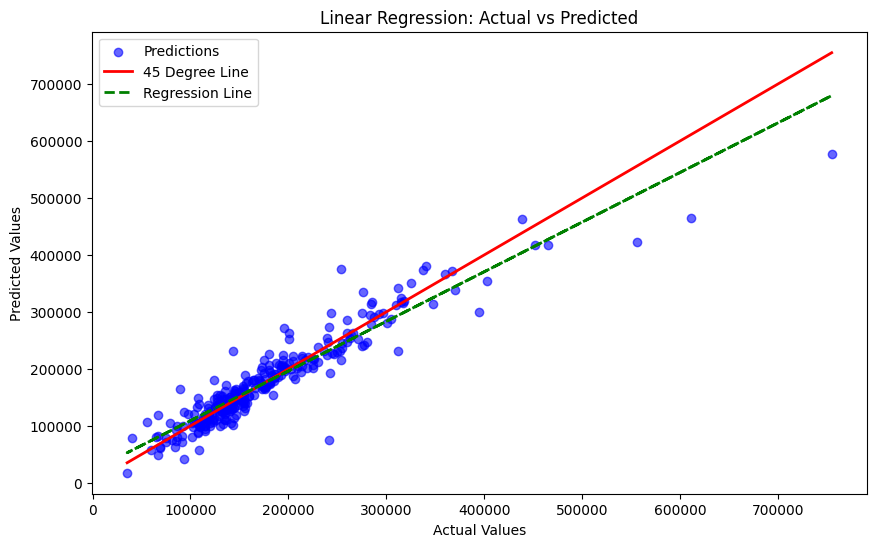

In [39]:
# Set plot size
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y_validation, prediction, alpha=0.6, color='blue', label='Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

# Plot a 45-degree line to show ideal predictions
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], color='red', linewidth=2, label='45 Degree Line')

# Fit and plot a regression line to show prediction trend
z = np.polyfit(y_validation, prediction, 1)
p = np.poly1d(z)
plt.plot(y_validation, p(y_validation), color='green', linewidth=2, linestyle='--', label='Regression Line')

# Show legend and plot
plt.legend()
plt.show()


# **Export the results**

In [40]:
# Generate predictions
predict = model.predict(X_test)

# Prepare the results
predictions_df = pd.DataFrame({
    'Id': Id_column,
    'SalePrice': predict
})

# Save the predictions to an Excel file
predictions_df.to_excel('/kaggle/working/predictions.xlsx', index=False)

print("Excel sheet has been successfully saved")

Excel sheet has been successfully saved
